In [3]:
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

In [4]:
img_shape = (7, 5)
img_size = 35

fp = Path('D:/Development/Data/datasets/txt/numbers_7x5.txt')
numbers = np.loadtxt(fp)

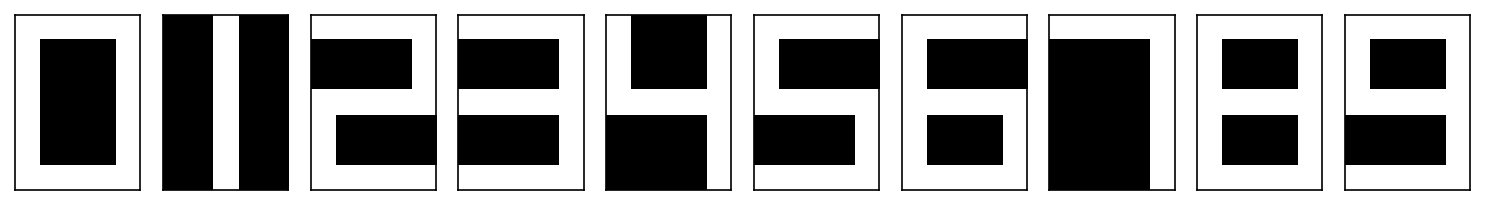

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=10)

fig.set_dpi(150)
fig.set_figwidth(10)
fig.set_figheight(5)

for n, ax in zip(numbers, axes.ravel()):
    ax.matshow(n.reshape(img_shape), cmap='binary_r')
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [6]:
labels = list([1 if i%2==0 else 0 for i in range(10)])

print(labels)

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


In [7]:
def binary_step(x: float) -> float:
    return 1.0 if x > 0.0 else 0.0

In [16]:
w = np.random.uniform(-1.0, 1.0, img_size)

n_epochs = 8

for epoch in range(n_epochs):
    for i in range(10):
        x = numbers[i]
        u = np.dot(w,x)

        y = binary_step(u)
        y_hat = labels[i]
        
        w += (y_hat - y) * x

for i in range(10):
    x = numbers[i]
    u = np.dot(w, x)

    y = 1 if u > 0.5 else 0
    y_hat = labels[i]

    print(f"{y} {y_hat} {y == y_hat} {round(u,2):>6}")

1 1 True   7.91
0 0 True  -6.41
1 1 True   4.38
0 0 True  -5.92
1 1 True   5.65
0 0 True  -0.41
1 1 True   8.19
0 0 True  -8.78
1 1 True    8.2
0 0 True  -0.39


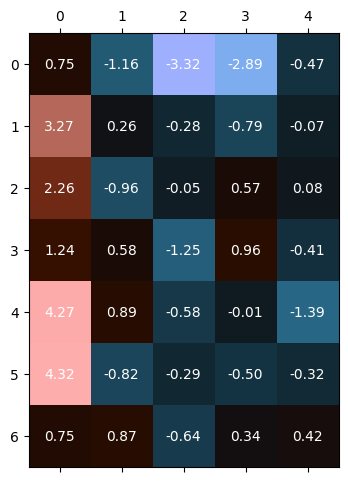

In [17]:
plt.matshow(w.reshape(img_shape), cmap='berlin')

for (i, j), z in np.ndenumerate(w.reshape(img_shape)):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color='white')

plt.show()

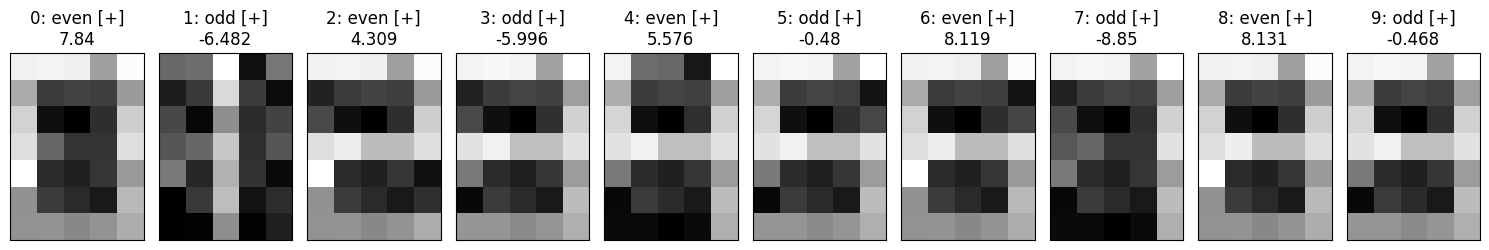

In [20]:
noise_size = 0.5

X = numbers + np.random.uniform(-noise_size, noise_size, img_size)
U = list([np.dot(w, x) for x in X])
Y = list([1 if u > 0.5 else 0 for u in U])

fig, axes = plt.subplots(nrows=1, ncols=10)

fig.set_dpi(100)
fig.set_figwidth(15)
fig.set_figheight(5)

for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(img_shape),  cmap='binary_r')
    ax.set_title(f"{i}: {'even' if Y[i] else 'odd'} [{'+' if Y[i] == labels[i] else '-'}]\n{round(U[i],3)}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()